# Support vector regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [4]:
df = pd.read_csv('svr.csv')
df.head()

,X1,X2,X3,X4,y
0,4.480614,1.363373,4.404379,3.399033,1.651549
1,0.149057,4.808124,4.067836,1.200827,-3.389763
2,4.162641,1.765042,1.313687,4.577033,0.977445
3,1.266521,3.202102,1.386985,3.580701,0.027955
4,3.171857,4.987052,2.216417,1.386676,3.632987


In [5]:
df.shape

(200, 5)

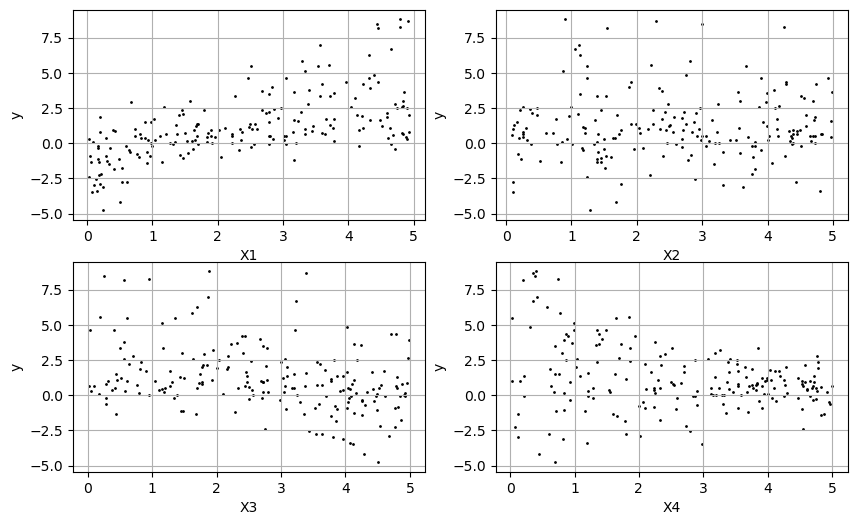

In [6]:
fig,ax = plt.subplots(2,2,figsize=(10,6))
ax = ax.ravel()
for i in range(4):
    ax[i].scatter(df[df.columns[i]],df['y'],color='k',s=1)
    ax[i].set_xlabel(df.columns[i])
    ax[i].set_ylabel('y')
    ax[i].grid()

### Test/train split

In [7]:
X = df[['X1','X2','X3','X4']]
y = df['y']

In [8]:
X_train, X_test, y_train, y_test =\
        train_test_split(X, y, 
                         test_size=0.33, 
                         random_state=42)

### Linear regression as baseline

In [29]:
linear = LinearRegression()
linear.fit(X_train,y_train)
linear.score(X_test,y_test)

0.6086552006495394

In [30]:
xaxis = np.linspace(-3,10,100)
yaxis = xaxis

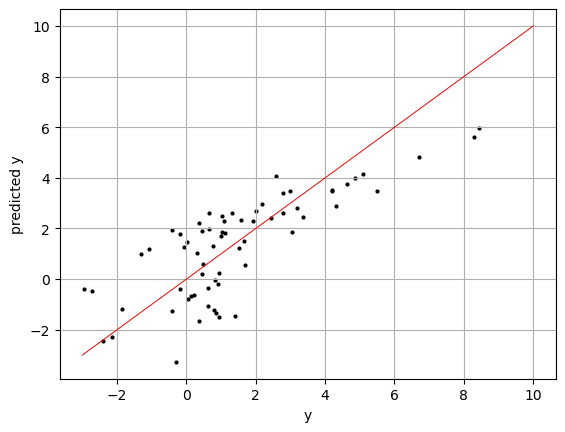

In [31]:
yhat = linear.predict(X_test)
plt.scatter(y_test,yhat,s=4,color='k')
plt.plot(xaxis,yaxis,color='r',linewidth=0.7)
plt.xlabel('y')
plt.ylabel('predicted y')
plt.grid();

### Support vector regressor with linear kernel

In [32]:
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train, y_train)
svr_linear.score(X_test,y_test)

0.6303795162411019

In [33]:
svr_linear = SVR(kernel='linear',
                 gamma='scale', C=1.0, 
                 epsilon=0.1)
svr_linear.fit(X_train, y_train)
svr_linear.score(X_test,y_test)

0.6303795162411019

### Support vector regressor with RBF kernel

In [34]:
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train, y_train);
svr_rbf.score(X_test,y_test)

0.7304232109135085

In [35]:
yhat0 = svr_linear.predict(X_test)
yhat = svr_rbf.predict(X_test)

In [36]:
print("RMSE for linear SVR:",
      np.sqrt(mean_squared_error(y_test,yhat0)))
print("RMSE for RBF kernelized SVR:",
      np.sqrt(mean_squared_error(y_test,yhat)))

RMSE for linear SVR: 1.3874704298641074
RMSE for RBF kernelized SVR: 1.1849143760665064


### GridSearch hyperparameters values

In [37]:
params = {'C':[0.01,0.05,0.1,0.5,1,2,5],
          'epsilon':[0.1,0.2,0.5,1]}

In [38]:
grid = GridSearchCV(svr_rbf,param_grid=params,
                    cv=5,scoring='r2')
grid.fit(X_train,y_train);

In [39]:
grid.best_params_

{'C': 5, 'epsilon': 0.5}

In [40]:
svr_best = grid.best_estimator_
svr_best.fit(X_train, y_train)
svr_best.score(X_test,y_test)

0.7862999176421599

In [41]:
svr_best=SVR(kernel='rbf',gamma='scale', 
             C=5.0, epsilon=0.5)
svr_best.fit(X_train, y_train)
svr_best.score(X_test,y_test)

0.7862999176421599

In [42]:
yhat = svr_best.predict(X_test)

print("RMSE for RBF kernelized SVR:",
      np.sqrt(mean_squared_error(y_test,yhat)))

RMSE for RBF kernelized SVR: 1.0549893252501146


### Plot y vs. yhat

In [43]:
yhat0 = linear.predict(X_test)
yhat = svr_best.predict(X_test)
xaxis = np.linspace(-4,10,100)
yaxis = xaxis

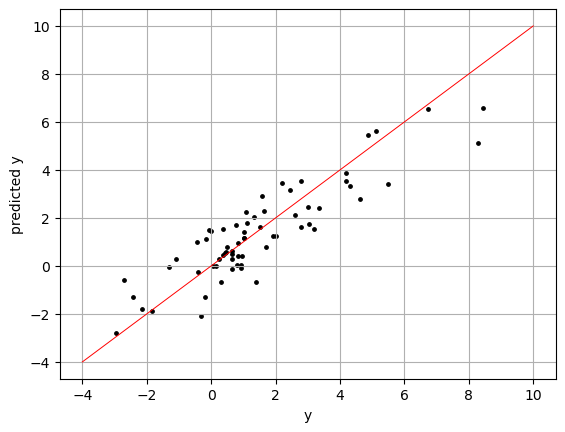

In [44]:
plt.scatter(y_test,yhat,s=6,color='k')
plt.plot(xaxis,yaxis,color='r',linewidth=0.7)
plt.xlabel('y')
plt.ylabel('predicted y')
plt.grid();

In [45]:
# Compare with linear regression

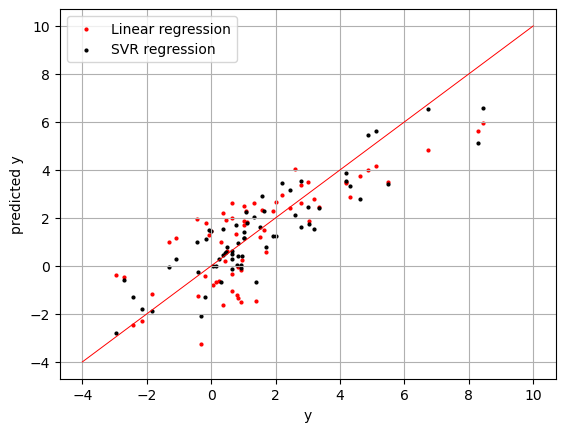

In [46]:
plt.scatter(y_test,yhat0,s=4,color='r',label = 'Linear regression')
plt.scatter(y_test,yhat,s=4,color='k',label = 'SVR regression')
plt.plot(xaxis,yaxis,color='r',linewidth=0.7)
plt.xlabel('y')
plt.ylabel('predicted y')
plt.legend()
plt.grid();